In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/advertisingcsv/Advertising.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/advertisingcsv/Advertising.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df. head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='TV', ylabel='Sales'>

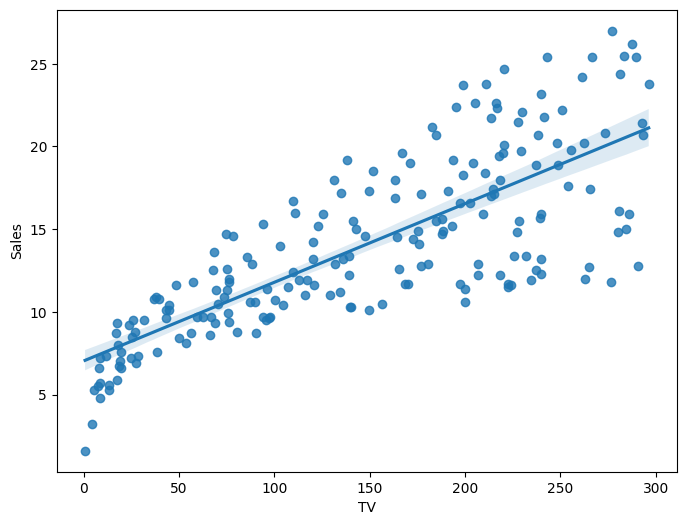

In [9]:
plt.figure(figsize=(8,6))
sns.regplot(x='TV',y='Sales',data=df)

<Axes: xlabel='Newspaper', ylabel='Sales'>

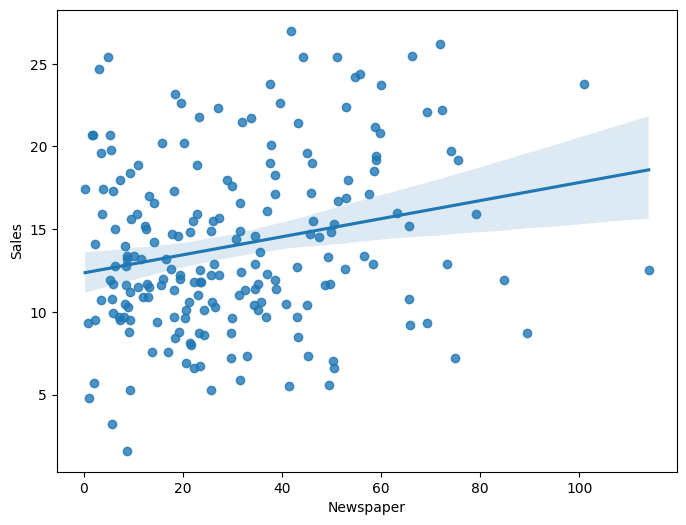

In [10]:
plt.figure(figsize=(8,6))
sns.regplot(x='Newspaper',y='Sales',data=df)

<Axes: xlabel='Radio', ylabel='Sales'>

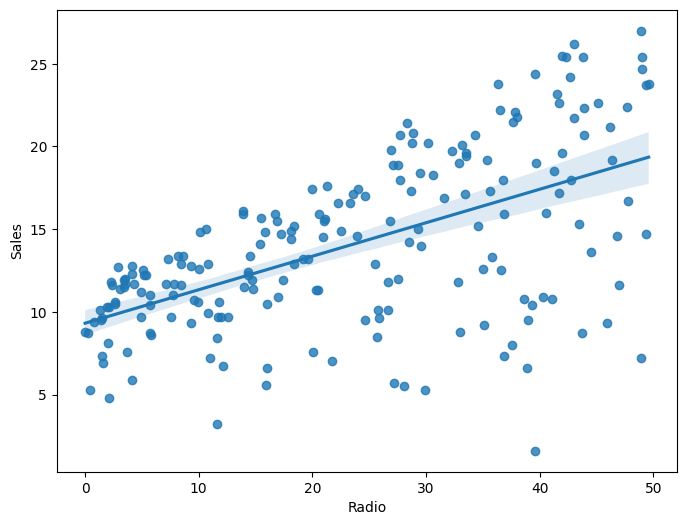

In [11]:
plt.figure(figsize=(8,6))
sns.regplot(x='Radio',y='Sales',data=df)

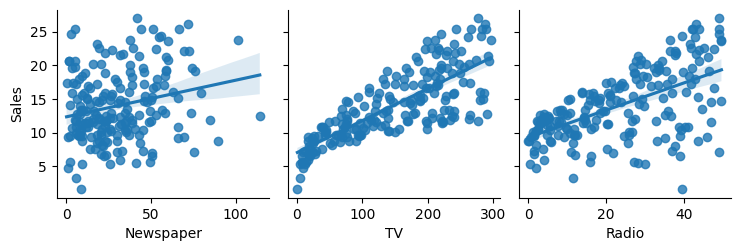

In [12]:
sns.pairplot(df, x_vars=["Newspaper", "TV", "Radio"], y_vars="Sales",kind='reg')

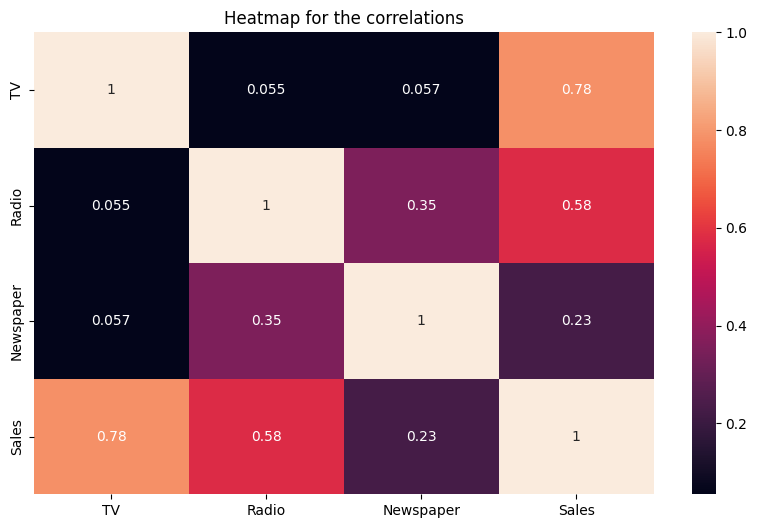

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.title("Heatmap for the correlations")
plt.show()

From the data we notice a strong correlation between sales and TV then Radio followed by newspaper

In [14]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error,r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 3.17
Root Mean Squared Error: 1.78
R-squared: 0.90


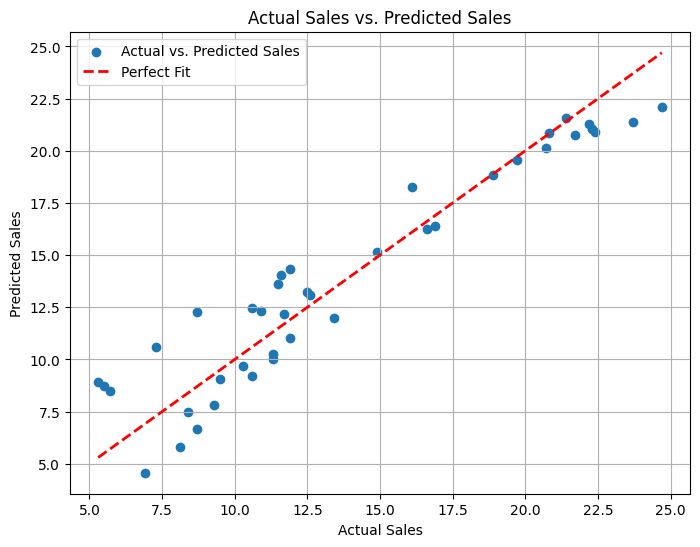

In [17]:
# Visualize the model's predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, label='Actual vs. Predicted Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Fit')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs. Predicted Sales")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()
